In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import ipywidgets as widgets
from IPython.display import display

%matplotlib inline
from qiskit import QuantumCircuit, QuantumRegister, Aer
from qiskit.quantum_info.operators import Operator
from qiskit.visualization import plot_histogram
from numpy import sin, cos, pi, linspace
import qiskit as qkt
import matplotlib.pyplot as plt
from random import seed,uniform

seed(42)

Run this first ⮥ Or just restart and rerun the whole kernel if there is a problem.

# IBM QCHack creative challenge 
## Team name: Quackers
## Project: Make your own Hadamard gate
### Team members:
-  Esteban Payares
-  Vismai Khanderao
-  Denis Jankovic 

## Introduction

<div style="text-align: justify;">Quantum computing relies on three purely quantum phenomena :

        - Superposition
        - Interference
        - Entanglement
    
Let's focus for this challenge on interference and see how important it is in quantum algorithms
    </div>

### Hadamard gate and interference

The Hadamard gate can showcase a good example for quantum interference. A qubit can be in a superposition of its two basis states : $$\alpha \left|0\right> + \beta \left|1\right> \qquad \textrm{or} \qquad \begin{pmatrix} \alpha \\ \beta \end{pmatrix}$$

The Hadamard gate $H$ takes the following matrix form :
$$ H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 && 1 \\ 1 && -1 \end{pmatrix} $$

If one applies an Hadamard gate on a qubit in the simple $\left|0\right> = \begin{pmatrix} 1 \\0 \end{pmatrix}$ state, one obtains a nice superposition of both basis states :
$$H\left|0\right> = \frac{1}{\sqrt{2}} \left|0\right> + \frac{1}{\sqrt{2}} \left|1\right> \qquad \textrm{or} \qquad \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix}$$

And on the  $\left|1\right> = \begin{pmatrix} 1 \\0 \end{pmatrix}$ state, the Hadamard gate gives a slightly different superposition :
$$H\left|1\right> = \frac{1}{\sqrt{2}} \left|0\right> - \frac{1}{\sqrt{2}} \left|1\right> \qquad \textrm{or} \qquad \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ -1 \end{pmatrix}$$

Now, if one reapplies a Hadamard gate on either of those states, <b>quantum interference appears :</b>

$$H\left(\frac{1}{\sqrt{2}} \left|0\right> + \frac{1}{\sqrt{2}} \left|1\right>\right) = \frac{1}{\sqrt{2}} H\left|0\right> + \frac{1}{\sqrt{2}} H\left|1\right> = \frac{1}{\sqrt{2}}\left(\frac{1}{\sqrt{2}} \left|0\right> + \frac{1}{\sqrt{2}} \left|1\right>\right) + \frac{1}{\sqrt{2}} \left(\frac{1}{\sqrt{2}} \left|0\right> - \frac{1}{\sqrt{2}} \left|1\right>\right) $$

This simplifies to : $$ \frac{1}{2} \left|0\right> + \frac{1}{2} \left|1\right> + \frac{1}{2} \left|0\right> - \frac{1}{2} \left|1\right> = \left|0\right> $$

Did you see the interference ? Exactly ! The two $\frac{1}{2} \left|0\right>$ have interfered constructively to give $\left|0\right>$ and the two $\frac{1}{2} \left|1\right>$ have interfered destructively and thus they disappeared.

NB: If you applied two consecutive $H$ gates on $\left|1\right>$ you would have ended up on $\left|1\right>$ again, this time the two $\frac{1}{2} \left|0\right>$ would have interfered destructively and the two $\frac{1}{2} \left|1\right>$ have interfered constructively. Try it out!

### When interference fails

Now to showcase how important interference is, suppose you start with the superposed qubit : 
$$\frac{1}{\sqrt{2}} \left|0\right> + \frac{1}{\sqrt{2}} \left|1\right> $$

You want to end up with $\left|0\right>$, so you want to make the $\left|0\right>$'s interfere constructively while the $\left|1\right>$'s interfere destructively. We saw you need a Hadamard gate for this. But let's keep in mind that you need to implement such a gate physically if you want to run the whole thing in the real world.

In the physical world, things are rarely perfectly perfect, so the Hadamard gate might not be exactly :
$$ H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 && 1 \\ 1 && -1 \end{pmatrix} \approx \begin{pmatrix} 0.71 && 0.71 \\ 0.71 && -0.71 \end{pmatrix} $$

It can for example be slighty off, in other words, the constructive and destructive interferences are not exactly totally constructive and destructive. If your Hadamard gate looked something like this :

$$ H' = \begin{pmatrix} 0.65 && 0.76 \\ 0.76 && -0.65\end{pmatrix} $$

When you apply $H'$ on your superposed state : 

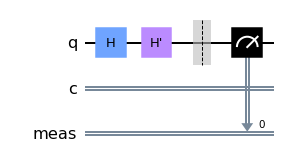

In [2]:
circuit = QuantumCircuit(1,1)
H_prime = Operator([[0.648640115686581, 0.7610952636313663], [0.7610952636313663, -0.648640115686581]])

circuit.h(0)
circuit.unitary(H_prime, 0, label="H'")

circuit.measure_all()

circuit.draw(output='mpl')

The measurement series you obtain will look like this :

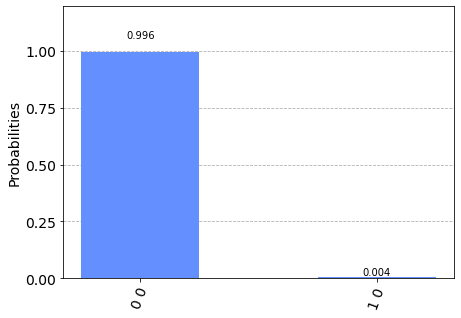

In [3]:
sim = qkt.Aer.get_backend('qasm_simulator')
qobj = qkt.assemble(circuit) 
result = sim.run(qobj).result() 

counts = result.get_counts()
plot_histogram(counts)

When you should have in fact gotten $\left|0\right>$ 100% of the time, here you got it only ~99% of the time, and the other times you even obtain the straight opposite : $\left|1\right>$.

### Grover's Search Algorithm

Without going into detail about how the algorithm works ([See here](https://qiskit.org/textbook/ch-algorithms/grover.html#3qubits)). If you have two qubits, you can encode 4 elements of a database by indexing them with $\left|00\right>, \left|01\right>, \left|10\right>, \left|11\right>$. 

You can then apply a succession of gates in order to find one of those elements. In our case, it will be the one marked with $\left|11\right>$. Most of those gates will be Hadamard gates that will make states interfere with one another so that all the states interfere destructively except the one we want to measure at the end. You see that quantum interference will be very important if you want the algorithm to work.

This is great, because sometimes, the speed it takes to apply all those gates is much faster than the time it would take a classical computer to find the marked element. Especially when the number of elements in the database is great !

This is what the circuit for Grover's Algorithm looks like :

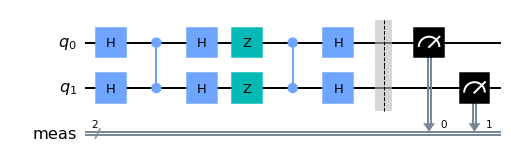

In [4]:
n = 2
grover_circuit = QuantumCircuit(n)

for q in range(n):
    grover_circuit.h(q)
    
grover_circuit.cz(0,1) # Oracle
grover_circuit.h(0)
grover_circuit.h(1)
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h(0)
grover_circuit.h(1)

grover_circuit.measure_all()

grover_circuit.draw('mpl', idle_wires=False)

The result when you run the circuit, should then give you $ \left|11\right> $ 100% of the time, on an ideal quantum computer that is.

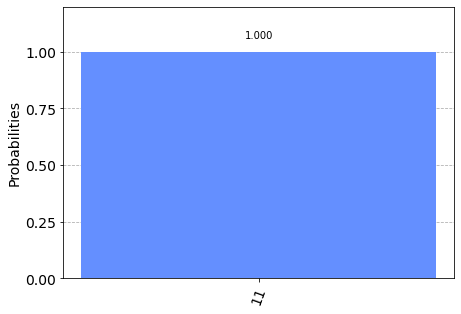

In [5]:
sim = qkt.Aer.get_backend('qasm_simulator')
qobj = qkt.assemble(grover_circuit) 
result = sim.run(qobj).result() 

counts = result.get_counts()
plot_histogram(counts)

## Your turn now !

Now it's your turn, you will have to make two waves interfere destructively in order to create a perfect Hadamard gate ! Be careful we will then use your Hadamard gate to implement Grover's algorithm. In other words, the circuit we will create is :

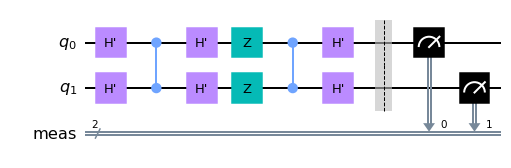

In [6]:
n = 2
grover_circuit = QuantumCircuit(n)
for q in range(n):
    grover_circuit.unitary(H_prime, q, label="H'")
grover_circuit.cz(0,1) # Oracle
grover_circuit.unitary(H_prime, 0, label="H'")
grover_circuit.unitary(H_prime, 1, label="H'")
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.unitary(H_prime, 0, label="H'")
grover_circuit.unitary(H_prime, 1, label="H'")

grover_circuit.measure_all()

grover_circuit.draw('mpl', idle_wires=False)

Where H' is <b>your</b> Hadamard gate, so we count on you ! Your goal is that at the end of the algorithm you obtain $ \left|11\right> $ 100% of the time. Be careful the less destructively the waves interfere, the less the ouput of the code will be correct. If the waves interfere constructively, then the circuit will even bring you back where you started with both qubits initialized to $\left|0\right>$.

In [7]:
import ipywidgets as widgets
from IPython.display import display

%matplotlib inline
from qiskit import QuantumCircuit, QuantumRegister, Aer
from qiskit.quantum_info.operators import Operator
from qiskit.visualization import plot_histogram
from numpy import sin, cos, pi, linspace
import qiskit as qkt
import matplotlib.pyplot as plt

def f(phase_1, phase_2):
    figure, ax = plt.subplots(3, constrained_layout=True)
    x = linspace(-2*pi, 2*pi, 1000)
    f = 1
    y_1 = cos(f * x + phase_1)
    y_2 = cos(f * x + phase_2)
    
    ax[0].plot(x, y_1)
    ax[0].plot(x, y_2)
    
    ax[1].set_ylim([-2.2, 2.2])
    ax[1].plot(x, y_1+y_2, 'purple')
    
    dphi = abs(phase_1-phase_2)%(2*pi)
    theta = dphi/4
    H_prime = Operator([[cos(theta),sin(theta)], 
                   [sin(theta),-cos(theta)]])
    
    n = 2
    grover_circuit = QuantumCircuit(n)
    for q in range(n):
        grover_circuit.unitary(H_prime, q, label='H_prime')
    grover_circuit.cz(0,1) # Oracle
    grover_circuit.unitary(H_prime, 0, label='H_prime')
    grover_circuit.unitary(H_prime, 1, label='H_prime')
    grover_circuit.z([0,1])
    grover_circuit.cz(0,1)
    grover_circuit.unitary(H_prime, 0, label='H_prime')
    grover_circuit.unitary(H_prime, 1, label='H_prime')
    
    grover_circuit.measure_all()

    sim = qkt.Aer.get_backend('qasm_simulator')
    qobj = qkt.assemble(grover_circuit) 
    result = sim.run(qobj).result() 

    counts = result.get_counts()
    ax[2].bar(counts.keys(),counts.values())
    ax[2].set_title("Results of the measurement")
    ax[2].set_xlabel("Index of the element")
    ax[2].set_ylabel("Number of occurences")

phase_1 = widgets.FloatSlider(min=uniform(0, pi/2), max=uniform(2*pi, 5*pi/2), step=0.01, value=uniform(pi-pi/6, pi+pi/6), description='Phase 1:', layout=widgets.Layout(width='75%'))
phase_2 = widgets.FloatSlider(min=uniform(0, pi/2), max=uniform(2*pi, 5*pi/2), step=0.01, value=uniform(pi-pi/6, pi+pi/6), description='Phase 2:', layout=widgets.Layout(width='75%'))
widgets.interactive(f, phase_1=phase_1, phase_2=phase_2)

interactive(children=(FloatSlider(value=2.9060039066949055, description='Phase 1:', layout=Layout(width='75%')…

You control the phases of the blue and orange waves. The sum of the two waves is the purple one. Destructive interference means a flat line. 

The last graph shows the results of the measurements after 1000 tries. Your goal would then be to obtain a single value : 11, all 1000 times.

## Conclusion

We decided to present the issue of interference in the form of an interactive tutorial so as to popularize how quantum interference plays a crucial role in Quantum Algorithms, and also to showcase what kind of effects on the outputs of a quantum algorithm a lack of correct interferenc has. 

It also shows through its interactivity the kind of exercise physicist have to go through to calibrate their quantum gates for example.

### How this project can benefit the quantum computing community

Drawing analogies is always useful, especially in the domain of quantum computing that deals with so many counter-intuitive phenomena from quantum mechanics.

Here it serves first a role of introduction and to give a sense of intuition for how quantum interference works. But it is also useful in a more technical way. This kind of interactive notebooks show how qiskit can be used to simulate imperfect gates (without even considering decoherence yet), or simple "custom" gates (noisy or not). For example a certain physical implementation of a sequence of pulses can at the end have an effect corresponding to a non-standard gate, or slightly deviating from a standard gate. One can then use qiskit and interactive Jupyter notebooks to, in a way, forecast what results one can obtain by using such gates.

It also shows in a more general way, that sometimes you don't need to be exactly on point with your tuning and you will still get pretty useful results. For example when the interference is not totally destructive but close, you still see a predominance of measurement obtaining the good result. This is a good analogy with NISQ for example, where one can use imperfect quantum computers and still get pertinent results.

### Issues faced

The first issue we faced, was on a pretty basic level: how to use the dephasing created by the user to create a custom quantum gate, and most importantly what function of that dephasing the elements of the matrix should be ?

We finally settled on a form with trig functions, always useful when one wants to preserve the unitarity of the matrix. The arguments of the trig functions are such as, that when the iterference is destructive, the matrix take the form of a Hadamard gate, and then strays more and more off as the interference becomes more and more constructive. When the interference is totally constructive, the custom gate is a simple Z-gate. Which is also nice in itself, because one could imagine asking the user to tune two dephasing such as to create a custom H-gate, and then to create a custom Z-gate.

The next question was how to showcase the difference in outputs due to incorrect dephasings, well we first just wanted to implement two consecutive imperfect Hadamard gates and sow the output. However that ended up not working, since even imperfect, our Hadamard gate applied twice, nullifies its own action, no matter the dephasing.

We then decide to implement a simple 2-qubit Grover Algorithm, since it is easy to simulate and is very sensitive to interference.

One can however easily imagine changing the algorithm implemented, the number and type of imperfect gates that need to be tuned by the user, etc... to maybe obtain even different outputs and even more interactivity.


The second issue, on a more technical level, was the refresh rate of Jupyterlab and it's interactive tools. We first wanted to make a timing-based game, where the two waves swept back and forth and the user needed to stop it by timing their click on a button. Then, after the click, the circuit is simulated, and the user sees how well they have done.

However that ended up being very difficult, since the refresh rate of the interactive widget would either make the animations laggy, or the click delayed with the animation. We tried even to go through JS to do the interactive interface, with little to no avail. We finally settled on a more manual approach, where the user has to set-up sliders themselves to obtain the best interference.

### Final Words

We greatly enjoyed doing this project, we didn't know each other before the hackathon, but met through the qchack discord, and ended up working quite well together. 

We want to thank all the organizers, IBM mentors, qBraid mentors. They really made this online event great and very efficient.